# 0. Preparation

# 0.1. Relevant imports

In [162]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# 0.2. Read Data

In [333]:
combats = pd.read_csv('combats.csv')
pokemon = pd.read_csv('pokemon.csv')

# Take a look at the data
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [81]:
pokemon = pokemon.set_index('pid')
pokemon.head()

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Question 1: Explore Data

## Df descriptions:

In [4]:
combats.describe()

,First_pokemon,Second_pokemon,Winner
count,50000.000000,50000.000000,50000.000000
mean,400.495640,403.159660,408.890100
std,229.549429,230.083644,231.159961
min,1.000000,1.000000,1.000000
25%,203.000000,207.000000,206.000000
50%,399.000000,402.000000,422.000000
75%,597.250000,602.000000,606.000000
max,800.000000,800.000000,800.000000


In [5]:
pokemon.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


## Columns descriptions

### Classes

In [82]:
# For all the classes together
classes = pd.DataFrame(pokemon['Class 1'].append(
    pokemon['Class 2']).value_counts())
classes.columns = ['Occurences']
classes.index.name = 'type'
classes

,Occurences
type,
Water,126
Normal,102
Flying,101
Grass,95
Psychic,90
Bug,72
Ground,67
Fire,64
Poison,62


In [83]:
pokemon.select_dtypes(
    include='object').describe().transpose().sort_values('unique')

,count,unique,top,freq
Class 1,800,18,Water,112
Class 2,414,18,Flying,97
Name,799,799,Audino,1


In [107]:
# For each class
class1 = pd.DataFrame(pokemon.groupby(['Class 1']).count().Name)
class1.columns = ['occurences']
class1

,occurences
Class 1,
Bug,69
Dark,31
Dragon,32
Electric,44
Fairy,17
Fighting,26
Fire,52
Flying,4
Ghost,32


In [108]:
# For each class
class2 = pd.DataFrame(pokemon.groupby(['Class 2']).count().Name)
class2.columns = ['occurences']
class2

,occurences
Class 2,
Bug,3
Dark,20
Dragon,18
Electric,6
Fairy,23
Fighting,26
Fire,12
Flying,97
Ghost,14


### Distributions

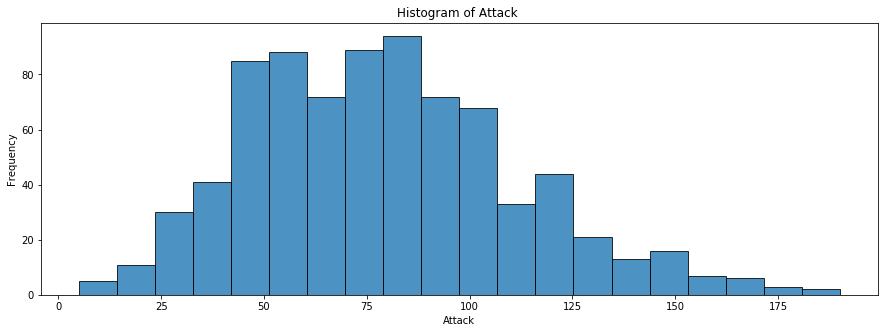

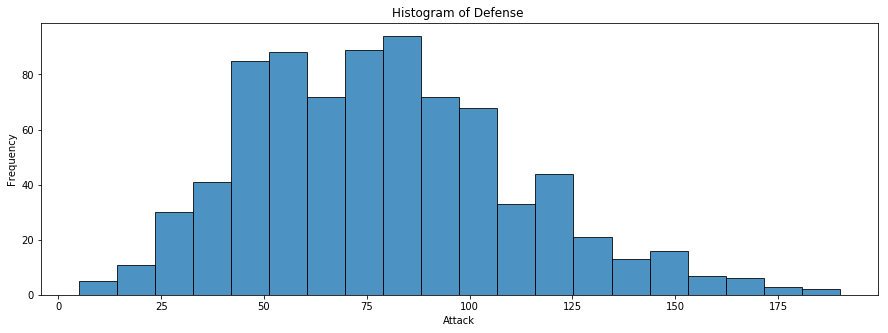

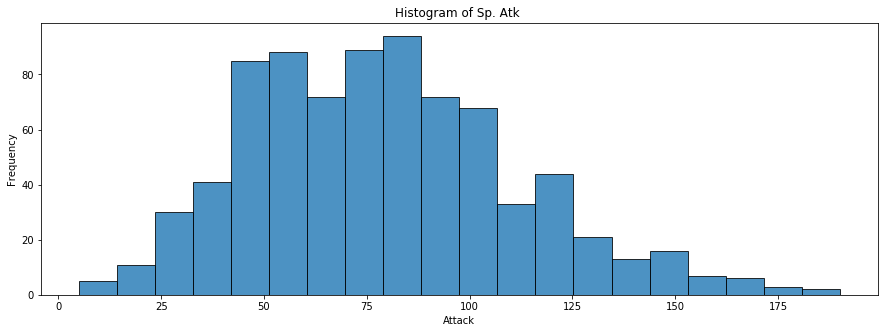

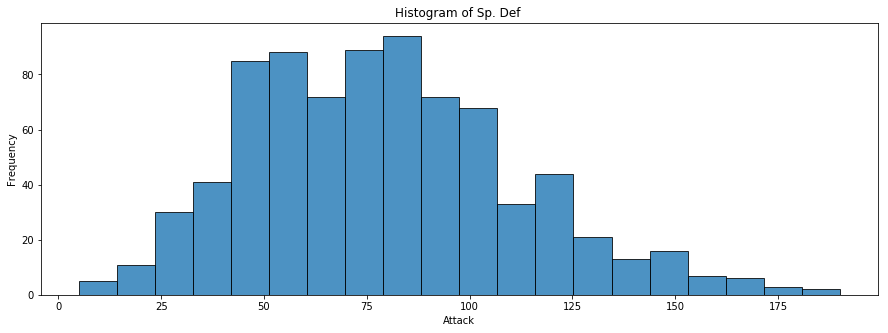

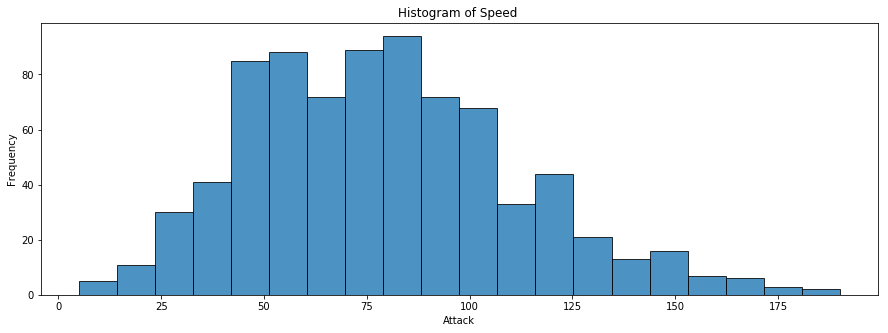

In [111]:
def create_hist(x, bins=20, xlabel='x', ylabel='Frequency', title=''):
    plt.figure(figsize=(15, 5))
    plt.hist(
        pokemon["Attack"], 20, edgecolor='black',
        alpha=0.8)  # 20 number of bins
    plt.xlabel('Attack')
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + xlabel + ' ' + title)
    plt.show()


# Attack
create_hist(pokemon["Attack"], 20, 'Attack', 'Frequency')
# Defense
create_hist(pokemon["Defense"], 20, 'Defense', 'Frequency')
# Sp. Atk
create_hist(pokemon["Sp. Atk"], 20, 'Sp. Atk', 'Frequency')
# Sp. Def
create_hist(pokemon["Sp. Def"], 20, 'Sp. Def', 'Frequency')
# Speed
create_hist(pokemon["Speed"], 20, 'Speed', 'Frequency')

## 1.2.1

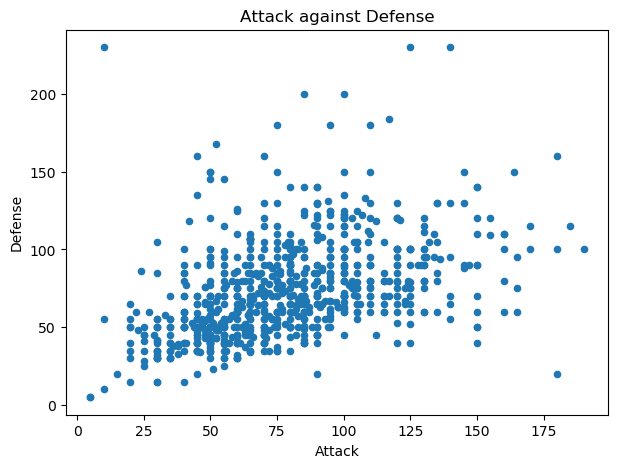

In [385]:
a =pokemon.plot(
    x='Attack',
    y='Defense',
    kind='scatter',
    figsize=(7, 5),
    rot=0,
    title='Attack against Defense')

## 1.2.2

In [88]:
attack_o_defense = pokemon['Attack'] / pokemon['Defense']
# Ascending
attack_o_defense = attack_o_defense
attack_o_defense.head()

pid
1    1.000000
2    0.984127
3    0.987952
4    0.813008
5    1.209302
dtype: float64

In [89]:
# Highest Attack / defense
pokemon.loc[attack_o_defense.sort_values(ascending=False).head(3).index]

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
430,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,True
348,Carvanha,Water,Dark,45,90,20,65,20,65,False
20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False


## 1.2.3

In [90]:
# Highest Attack / defense
pokemon.loc[attack_o_defense.sort_values().head(3).index]

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
231,Shuckle,Bug,Rock,20,10,230,10,230,5,False
140,Magikarp,Water,NaN,20,10,55,15,20,80,False
485,Bronzor,Steel,Psychic,57,24,86,24,86,23,False


## 1.2.4

In [125]:
winners = combats.groupby('Winner').count()['First_pokemon'].sort_values(
    ascending=False)
# Most winners

pokemon.loc[winners.head(10).index]

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Winner,,,,,,,,,,
163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True
154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False
438,Infernape,Fire,Fighting,76,104,71,104,71,108,False
428,Jirachi,Steel,Psychic,100,100,100,100,100,100,True
432,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,True
314,Slaking,Normal,NaN,150,160,100,95,65,100,False
394,Mega Absol,Dark,NaN,65,150,60,115,60,115,False
214,Murkrow,Dark,Flying,60,85,42,85,42,91,False
249,Mega Houndoom,Dark,Fire,75,90,90,140,90,115,False


## 1.3

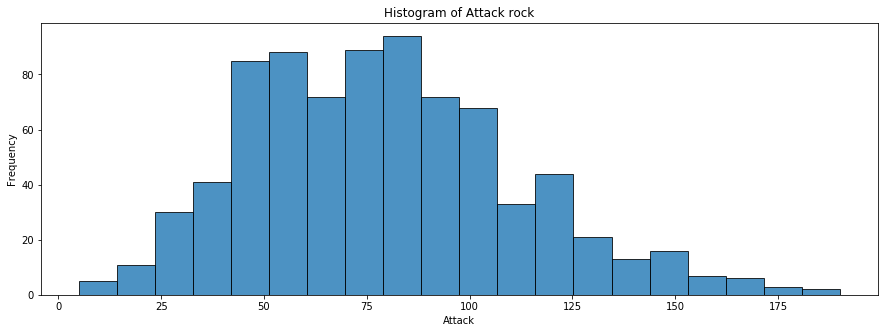

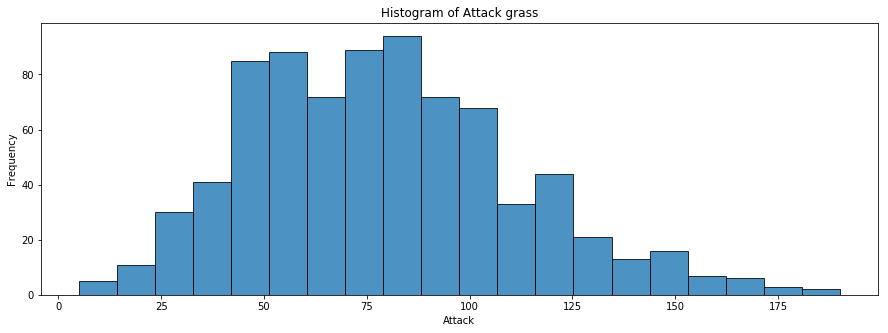

In [112]:
pokemon_rock = pokemon.loc[(pokemon['Class 1'] == 'Rock') |
                           (pokemon['Class 2'] == 'Rock')]
pokemon_grass = pokemon.loc[(pokemon['Class 1'] == 'Grass') |
                            (pokemon['Class 2'] == 'Grass')]

create_hist(
    x=pokemon_rock['Attack'],
    bins=20,
    xlabel="Attack",
    ylabel='Frequency',
    title='rock')
create_hist(x=pokemon_grass['Attack'], xlabel='Attack', title='grass')

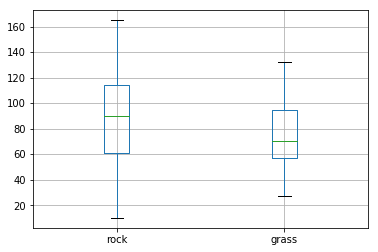

In [123]:
comparaison_df = pd.DataFrame(
    [pokemon_rock['Attack'], pokemon_grass['Attack']]).transpose()
comparaison_df.columns = ['rock', 'grass']
comparaison_df.boxplot()

## 1.4

In [ ]:
winners = combats.groupBy("Winner").agg(count("*").alias("wins"))
winners_pokemon_joined = winners.join(pokemon,
                                      winners.index == pokemon.pid).sort(
                                          desc("wins"))
# Most winners

winners_pokemon_joined.take(10).toPandas()['Name'].tolist()

# Question 2: Prediction

## 2.1

In [133]:
pokemon.head(1)

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False


In [134]:
combats.head(1)

,First_pokemon,Second_pokemon,Winner
0,266,298,298


In [181]:
data = combats.merge(
    pokemon, left_on='First_pokemon', right_index=True, how='inner')
data = data.merge(
    pokemon, left_on='Second_pokemon', right_index=True, how='inner')

data['outcome'] = np.where(data['Winner'] == data['First_pokemon'], 1, 0)
data = data.drop(
    columns=["First_pokemon", "Second_pokemon", "Name_x", "Name_y", 'Winner'])

data['Legendary_x'] = 1 - pd.get_dummies(data['Legendary_x'])
data['Legendary_y'] = 1 - pd.get_dummies(data['Legendary_y'])

data.head(1)

,Class 1_x,Class 2_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,Legendary_x,Class 1_y,Class 2_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Legendary_y,outcome
0,Rock,Ground,50,64,50,45,50,41,0,Grass,Dark,70,70,40,60,40,60,0,0


In [183]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
classes.loc['nan'] = [0]
number.fit(classes.index.astype(str))

columns_to_transform = ['Class 1_x', 'Class 2_x', 'Class 1_y', 'Class 2_y']

for col in columns_to_transform:
    data[col] = number.transform(data[col].astype(str))

In [191]:
data = data.reset_index(drop=True)

data.head()

,Class 1_x,Class 2_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,Legendary_x,Class 1_y,Class 2_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Legendary_y,outcome
0,15,10,50,64,50,45,50,41,0,9,1,70,70,40,60,40,60,0,0
1,5,18,70,80,50,35,35,35,0,9,1,70,70,40,60,40,60,0,0
2,17,10,110,78,73,76,71,60,0,9,1,70,70,40,60,40,60,0,0
3,3,7,50,65,107,105,107,86,0,9,1,70,70,40,60,40,60,0,1
4,12,18,73,115,60,60,60,90,0,9,1,70,70,40,60,40,60,0,1


## 2.2

the model transforms the categorical variable legendary to 0 or 1 <br>
And gives the Categorical variables like classes labels from 0 to number of classes+1 since some pokemon can have nan as their second type

## 2.3

In [186]:
def split_data(x, y, ratio):
    """"   
        splits the dataset based on the split ratio.
    
    INPUT:
           x               - The feature columns
           y               - the actual outcome
           ratio           - the ratio

       OUTPUT:
           Returns the data split randomly
    """
    n = len(x)
    if len(y) != n:
        raise ValueError("Vector x and y have a different size")

    n_train = int(ratio * n)
    train_ind = np.random.choice(n, n_train, replace=False)

    index = np.arange(n)
    mask = np.in1d(index, train_ind)

    test_ind = np.random.permutation(index[~mask])

    x_train = x[train_ind]
    y_train = y[train_ind]

    x_test = x[test_ind]
    y_test = y[test_ind]

    return x_train, y_train, x_test, y_test

In [195]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
x_train, y_train, x_test, y_test = split_data(x, y, 0.9)

In [218]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

n_estimators = [10, 25, 50, 100]
n_max_depths = [2, 4, 10]
results = []

for estimator in n_estimators:
    for depth in n_max_depths:
        model = RandomForestClassifier(n_estimators=estimator, max_depth=depth)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_pred, y_test)
        results.append([estimator, depth, accuracy])
        print('testing for estimator:', estimator, 'depth:', depth,
              'accuracy:', accuracy)
print('done')

testing for estimator: 10 depth: 2 accuracy: 0.809
testing for estimator: 10 depth: 4 accuracy: 0.8568
testing for estimator: 10 depth: 10 accuracy: 0.9194
testing for estimator: 25 depth: 2 accuracy: 0.7924
testing for estimator: 25 depth: 4 accuracy: 0.8636
testing for estimator: 25 depth: 10 accuracy: 0.9308
testing for estimator: 50 depth: 2 accuracy: 0.8198
testing for estimator: 50 depth: 4 accuracy: 0.8624
testing for estimator: 50 depth: 10 accuracy: 0.936
testing for estimator: 100 depth: 2 accuracy: 0.8112
testing for estimator: 100 depth: 4 accuracy: 0.874
testing for estimator: 100 depth: 10 accuracy: 0.933
done


## 2.4

In [207]:
pd.DataFrame(
    results, columns=['n_estimators', 'n_max_depths', 'accuracy']).sort_values(
        'accuracy', ascending=False)

,n_estimators,n_max_depths,accuracy
11,100,10,0.9334
8,50,10,0.9320
5,25,10,0.9262
2,10,10,0.9224
4,25,4,0.8824
10,100,4,0.8654
7,50,4,0.8618
1,10,4,0.8394
9,100,2,0.8086
3,25,2,0.7972


## 2.5

We're not using the whole data for training and testing <br>
The Data could be unbalanced and we could test on something we haven't seen in training for some type combinations of pokemons.<br>
To get rid of this problem -> Use Cross Validation

## 2.6

In [245]:
def build_k_indices(y, k_fold, seed=1):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [
        indices[k * interval:(k + 1) * interval] for k in range(k_fold)
    ]
    return np.array(k_indices)


def cross_validation(y, x, k_fold, estimator, depth):
    """returns the precision and recalls mean after cross validation."""

    k_indices = build_k_indices(y, k_fold)
    precisions = []
    recalls = []
    accuracies = []
    for k in range(k_fold):
        # get k'th subgroup in test, others in train
        te_indice = k_indices[k]
        tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
        tr_indice = tr_indice.reshape(-1)
        y_te = y[te_indice]
        y_tr = y[tr_indice]
        x_te = x[te_indice]
        x_tr = x[tr_indice]

        #         means=np.mean(x_tr, axis=0)
        #         stds=np.std(x_tr, axis=0)

        #         x_tr= standardize(x_tr)
        #         x_te = standardize(x_te)

        # Training a random forest classifier on the training set
        rf = RandomForestClassifier(
            n_estimators=estimator, max_depth=depth, n_jobs=-1)
        rf.fit(x_tr, y_tr)

        # Get the predictions
        y_pred = rf.predict(x_te)

        #Measure of accuracy
        precision, recall, f_score, support = precision_recall_fscore_support(
            y_te, y_pred, average='binary')
        accuracy = accuracy_score(y_te, y_pred)
        # append the precision and recall
        precisions.append(precision)
        recalls.append(recall)
        accuracies.append(accuracy)

    return np.array(precisions).mean(), np.array(recalls).mean(), np.array(
        accuracies).mean()

In [246]:
results = []
for estimator in n_estimators:
    for depth in n_max_depths:
        precision, recall, accuracy = cross_validation(y, x, 5, estimator,
                                                       depth)
        results.append([estimator, depth, accuracy, precision, recall])
        print('testing for estimator:', estimator, 'depth:', depth,
              'accuracy:', accuracy)
print('done')

testing for estimator: 10 depth: 2 accuracy: 0.7895
testing for estimator: 10 depth: 4 accuracy: 0.84498
testing for estimator: 10 depth: 10 accuracy: 0.9254200000000001
testing for estimator: 25 depth: 2 accuracy: 0.80016
testing for estimator: 25 depth: 4 accuracy: 0.86288
testing for estimator: 25 depth: 10 accuracy: 0.93204
testing for estimator: 50 depth: 2 accuracy: 0.81192
testing for estimator: 50 depth: 4 accuracy: 0.8680399999999999
testing for estimator: 50 depth: 10 accuracy: 0.93348
testing for estimator: 100 depth: 2 accuracy: 0.8122999999999999
testing for estimator: 100 depth: 4 accuracy: 0.8737600000000001
testing for estimator: 100 depth: 10 accuracy: 0.93492
done


In [247]:
pd.DataFrame(
    results,
    columns=[
        'n_estimators', 'n_max_depths', 'accuracy', 'precision', 'recall'
    ]).sort_values(
        'accuracy', ascending=False)

,n_estimators,n_max_depths,accuracy,precision,recall
11,100,10,0.93492,0.923074,0.940524
8,50,10,0.93348,0.922859,0.937478
5,25,10,0.93204,0.920045,0.937516
2,10,10,0.92542,0.915104,0.928156
10,100,4,0.87376,0.879731,0.848545
7,50,4,0.86804,0.876603,0.838501
4,25,4,0.86288,0.871686,0.832096
1,10,4,0.84498,0.853811,0.810601
9,100,2,0.81230,0.848603,0.733258
6,50,2,0.81192,0.849147,0.731448


In [248]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10)
clf.fit(x, y)
clf.feature_importances_

array([0.00697219, 0.01231935, 0.02280888, 0.04579335, 0.01317311,
       0.03235308, 0.01939759, 0.35801547, 0.00626632, 0.00710043,
       0.010227  , 0.01754847, 0.03901846, 0.01329241, 0.02918587,
       0.01610451, 0.34446931, 0.00595421])

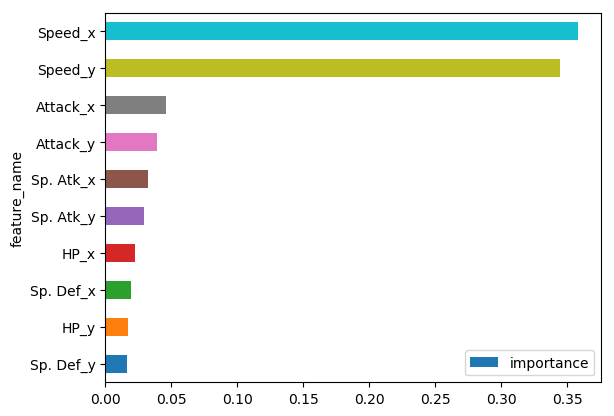

In [250]:
feature_importance = pd.DataFrame([data.columns.tolist()[:-1]]).transpose()
feature_importance.columns = ['feature_name']
feature_importance['importance'] = clf.feature_importances_
feature_importance = feature_importance.sort_values('importance').tail(10)
ax = feature_importance.plot.barh(x='feature_name', y='importance')

# Question 3: Ranking

## 3.1

In [270]:
n_wins = combats.groupby('Winner').count()['First_pokemon']
n_combats = combats.groupby(
    'First_pokemon').count()['Second_pokemon'] + combats.groupby(
        'Second_pokemon').count()['First_pokemon']
win_ratio = n_wins / n_combats
best = win_ratio.sort_values(ascending=False).head(10)

pokemon['win_ratio'] = win_ratio

In [271]:
pokemon.loc[best.index]

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,win_ratio
155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False,0.984496
513,Weavile,Dark,Ice,70,120,65,45,85,125,False,0.974790
704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,True,0.968000
20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False,0.966387
154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False,0.964539
477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False,0.961240
727,Greninja,Water,Dark,72,95,67,103,71,122,False,0.960630
717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,False,0.959350
165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,True,0.952000
350,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,False,0.950000


## 3.2

G^2 represents a walk of length 2 of the adjacency matrix.
G represents a walk of length 1 of the adjacency matrix.

So A tries to capture the dominance of a pokemon against another one directly and against another one that is dominated by one pokemon that the first one is dominating.<br>
for example G describes if i dominates j <br>
G^2 describes if i dominates k when j dominates k


## 3.3

In [334]:
combats['not_winner'] = np.where(combats['Winner'] == combats['First_pokemon'],
                                 combats['Second_pokemon'],
                                 combats['First_pokemon'])
combats

,First_pokemon,Second_pokemon,Winner,not_winner
0,266,298,298,266
1,702,701,701,702
2,191,668,668,191
3,237,683,683,237
4,151,231,151,231
5,657,752,657,752
6,192,134,134,192
7,73,545,545,73
8,220,763,763,220
9,302,31,31,302


In [326]:
import networkx as nx
network = nx.convert_matrix.from_pandas_edgelist(
    combats, 'Winner', 'not_winner', edge_attr=True, create_using=nx.DiGraph())
print(nx.info(network))

Name: 
Type: DiGraph
Number of nodes: 784
Number of edges: 46336
Average in degree:  59.1020
Average out degree:  59.1020


In [327]:
G = nx.adjacency_matrix(network)
adj = G.todense()

In [328]:
np.array(adj)

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [329]:
np.unique(np.array(adj))

array([0, 1], dtype=int64)

In [330]:
nx.find_cycle(network)

[(73, 485), (485, 38), (38, 149), (149, 545), (545, 73)]

In [359]:
matrix = np.zeros((801,801))

In [360]:
for index, row in combats.iterrows():
    matrix[row['Winner'],row['not_winner']] += 1
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [361]:
np.unique(np.array(matrix))

array([0., 1., 2., 3., 4.])

In [363]:
matrix = matrix - matrix.transpose()

In [366]:
G = np.piecewise(matrix, [matrix < 0, matrix > 0], [lambda x: 0, lambda x: 1])

In [373]:
A = G + np.linalg.matrix_power(G, 2)

In [375]:
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 2., 0., ..., 0., 0., 0.],
       ...,
       [0., 7., 3., ..., 0., 1., 1.],
       [0., 7., 5., ..., 5., 0., 1.],
       [0., 7., 4., ..., 3., 0., 0.]])

## 3.4

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  8.,  9., 10.],
       [ 0.,  0.,  0., ...,  9., 10., 10.],
       ...,
       [ 0.,  0.,  0., ..., 12., 13., 14.],
       [ 0.,  0.,  0., ..., 16., 18., 20.],
       [ 0.,  0.,  0., ..., 13., 13., 14.]])

In [382]:
pokemon = pd.read_csv('pokemon.csv')

wins = pd.DataFrame(index=pokemon.pid, columns=pokemon.pid, data=[]).fillna(0)

for row in combats.values:
    
    winner = row[2]
    other = row[1] if row[1] != row[2] else row[0]
    
    wins.loc[winner, other] += 1
    
# Compute G from the wins matrix
GG = np.where(wins - wins.transpose() > 0, 1, 0)

In [383]:
GG

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [384]:
G

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [386]:
import networkx as nx
G = nx.DiGraph()
#Create the nodes
G.add_nodes_from(range(1,800))

In [387]:
#Create the edges
for i in range(len(combats)):
    first=combats['First_pokemon'].iloc[i]
    second=combats['Second_pokemon'].iloc[i]
    winner=combats['Winner'].iloc[i]
    if(first==winner):
        G.add_edge(first,second)
    else:
        G.add_edge(second,first)

In [388]:
print(nx.info(G))
adjacency = nx.adjacency_matrix(G)

Name: 
Type: DiGraph
Number of nodes: 800
Number of edges: 46336
Average in degree:  57.9200
Average out degree:  57.9200


In [392]:
np.array(adjacency.todense())

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [393]:
(GG==np.array(adjacency.todense())).all()

False